Task 5 (i)

In [43]:
import pandas as pd

# The dataset is loaded into a pandas DataFrame for analysis.
site_1083 = pd.read_csv('rawpvr_2018-02-01_28d_1083 TueFri.csv')

# The 'Date' column contains date and time information in string format.
# To facilitate time-based filtering (i.e., selecting data for specific hours), we need to convert it to datetime format.
site_1083['Date'] = pd.to_datetime(site_1083['Date'])

# The values of the 'Flags' column are all 0's and are updated to represent the day of the week as an integer (2 = Tuesday, 5 = Friday).
# This makes it easier to filter data by specific days by when calculating the statistics for Tuesdays and Fridays.
site_1083['Flags'] = site_1083['Date'].dt.dayofweek + 1 

# The 'Flag Text' column is missing all of its values and is updated by storing the day of the week as a string (i.e. Tuesday and Friday ) by referring to the Flags column.
# This update improves the readability of the DataFrame when filtering or grouping by specific days.
site_1083['Flag Text'] = site_1083['Date'].dt.day_name()

# The data is Filtered for Tuesday mornings using the 'Flags' column (2 = Tuesday) and 'dt.hour' to extract the hour from the 'Date' column.
# This allows filtering specific times efficiently. Using 'Flags' (integers) is faster than 'Flag Text' (strings).
tuesday_data = site_1083[
    (site_1083['Flags'] == 2) &  
    (site_1083['Date'].dt.hour >= 7) & (site_1083['Date'].dt.hour < 19)
] 

# Count the non-empty values in the 'Gap (s)' column.
number_of_nonempty_cells = tuesday_data['Gap (s)'].notna().sum()

# Count The total number of cells retrieved in the filtered 'Gap (s)' column.
number_of_cells = tuesday_data.shape[0]

# The Column Completeness is then calculated using the following formula.
column_completeness = (number_of_nonempty_cells * 100) / number_of_cells

# The Column Completeness is displayed
print(f"Column Completeness for 'Gap (s)' on Tuesdays between 07:00 and 18:59:59: {column_completeness:.2f}%")

Column Completeness for 'Gap (s)' on Tuesdays between 07:00 and 18:59:59: 98.04%


Task 5 (ii)

'Missing values in the filtered dataframe: '

Date                0
Lane                0
Lane Name           0
Direction           0
Direction Name      0
Speed (mph)         2
Headway (s)       281
Gap (s)           685
Flags               0
Flag Text           0
dtype: int64

Column Completeness for 'Gap (s)' in NB_MID lane on Tuesdays (07:00-18:59:59): 98.03%

Descriptive Statistics for 'Gap (s)' in NB_MID lane on Tuesdays (07:00-18:59:59):
count    34002.000000
mean         4.394434
std          6.311024
min          0.006000
25%          1.400000
50%          2.264000
75%          4.249000
max         88.080000
Name: Gap (s), dtype: float64

Skewness: 3.91
Kurtosis: 19.83

IQR: 2.85
Number of outliers based on 1.5*IQR: 3980


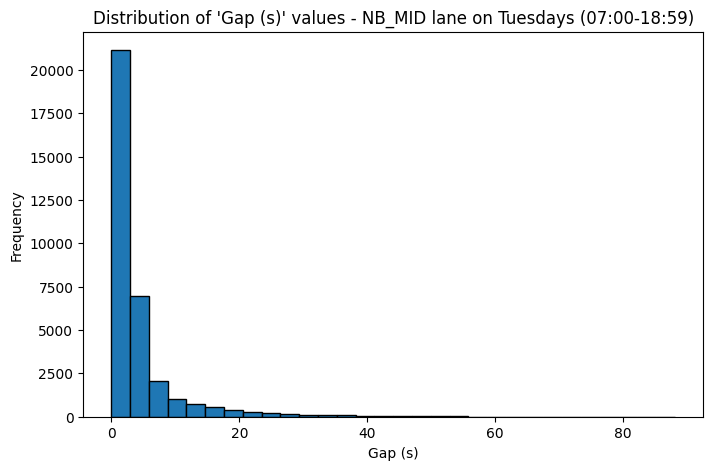

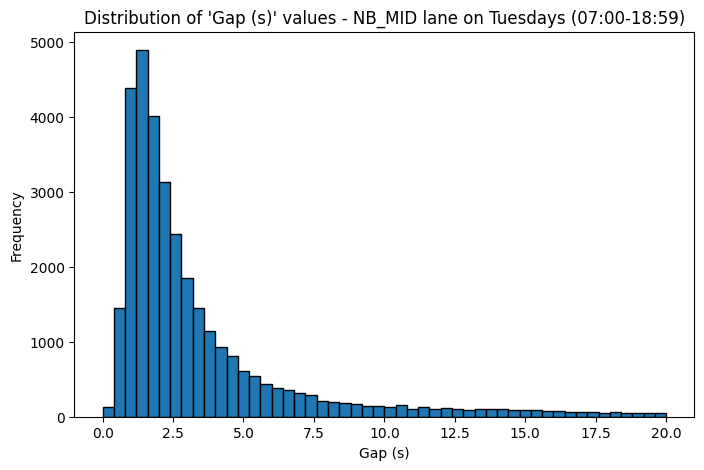

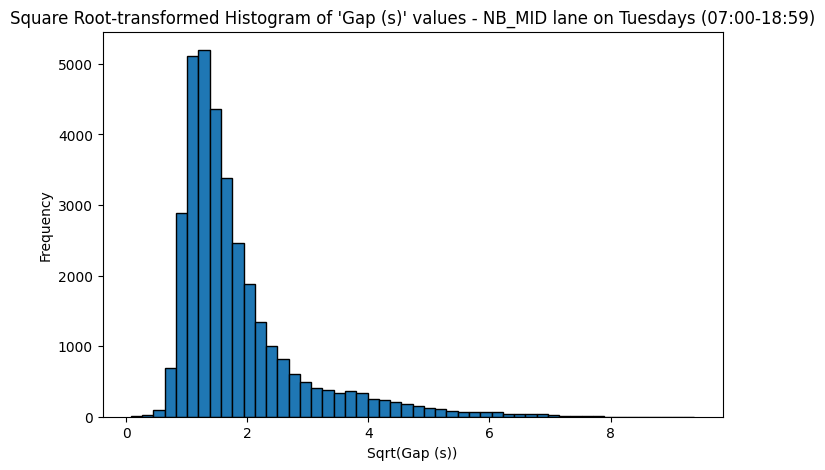

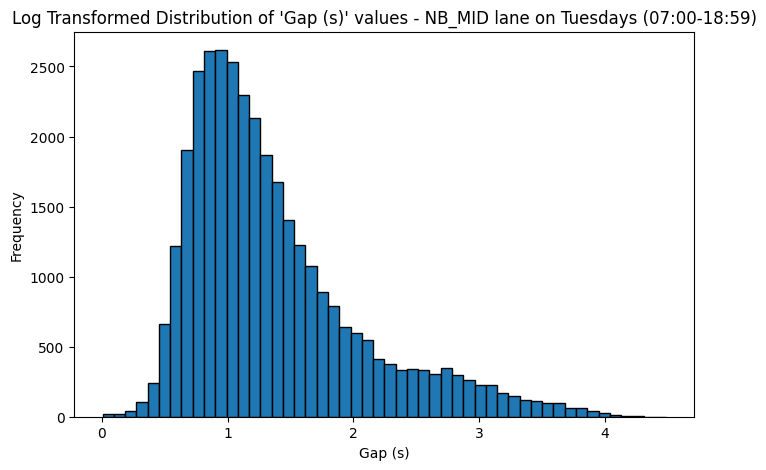

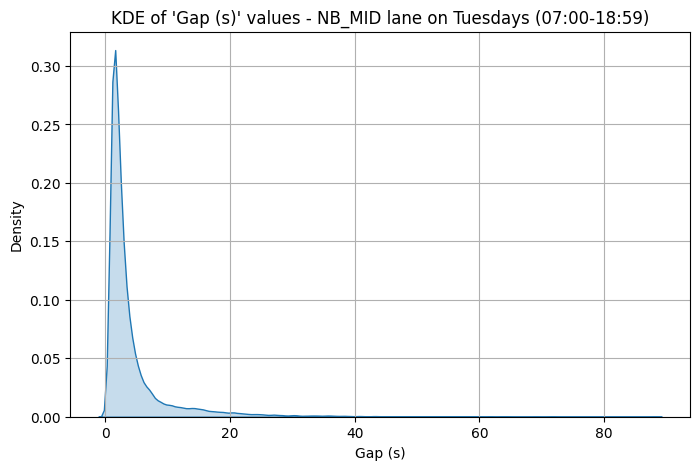

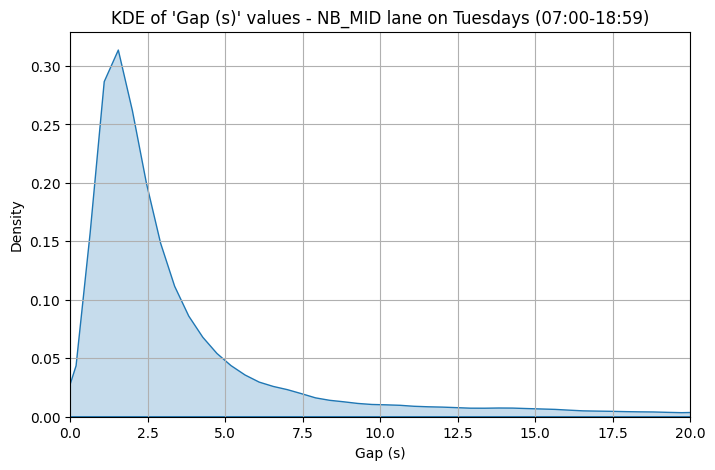

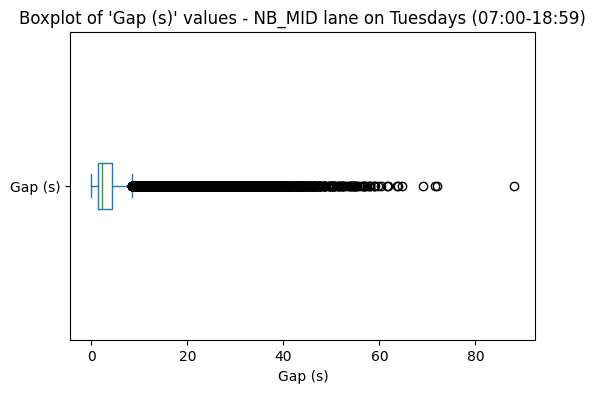

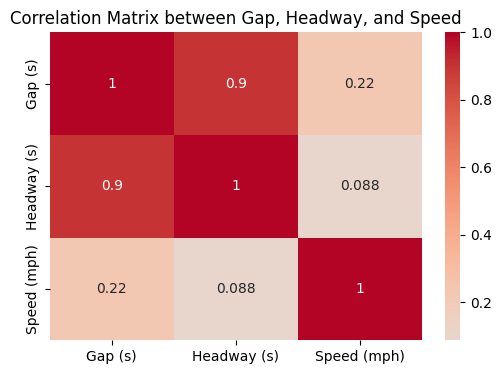

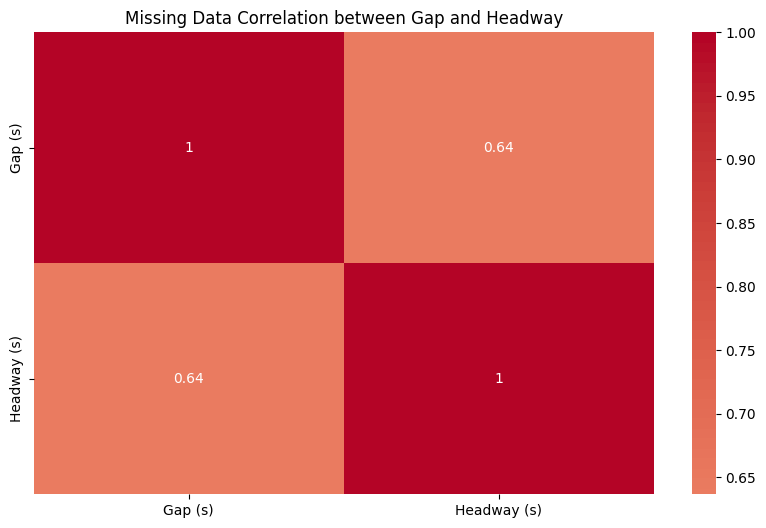

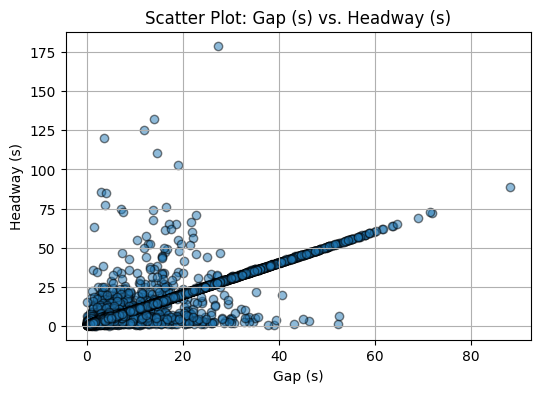

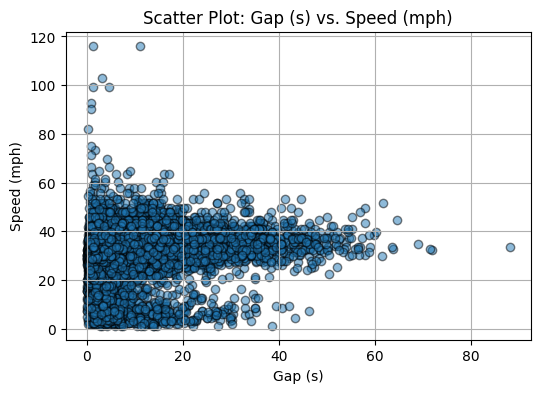

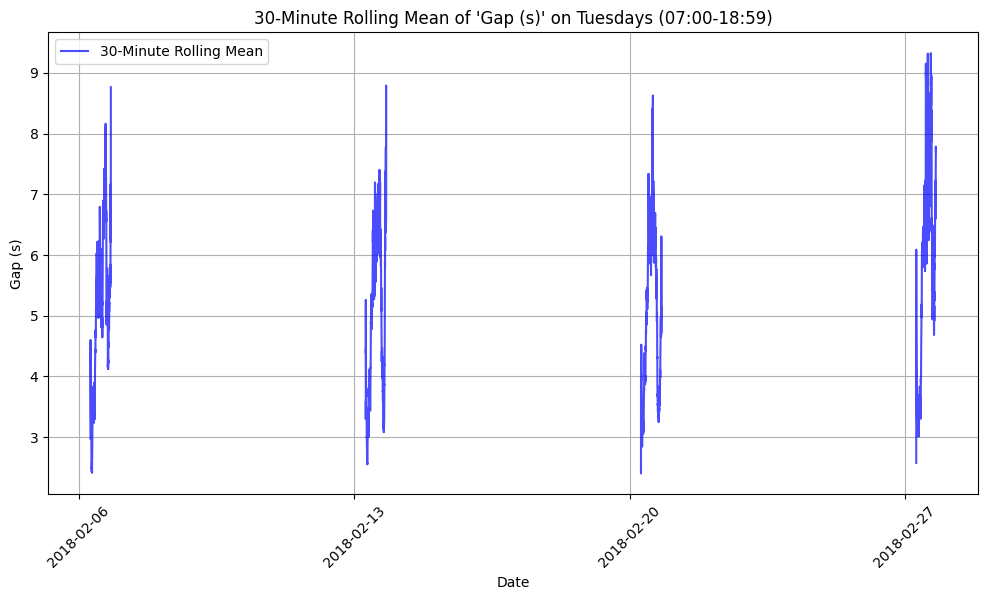

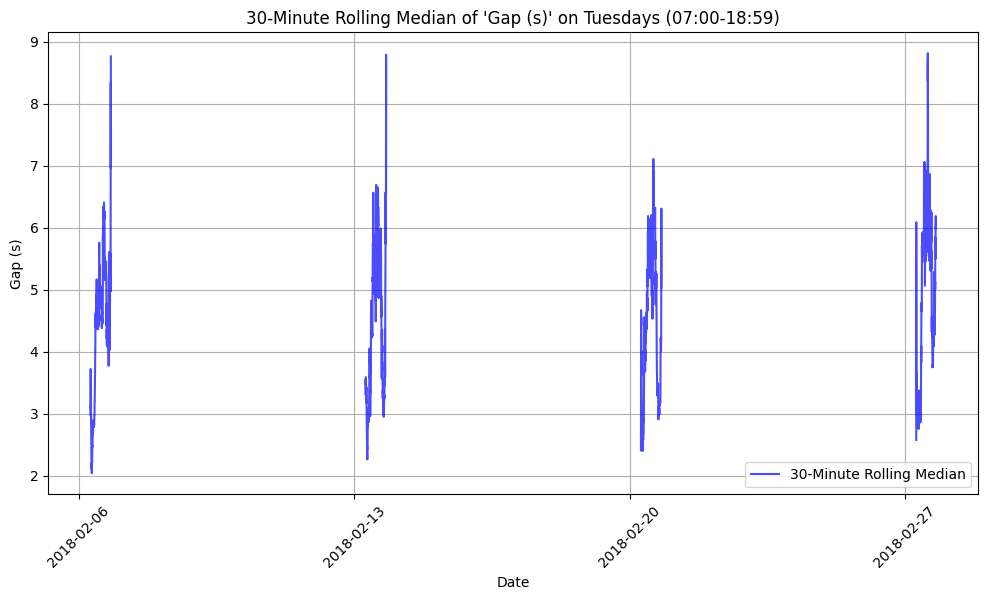

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# The data is filtered for the NB_MID lane (i.e lane 2) on Tuesdays between 07:00 and 18:59:59.
# Filtering for NB_MID using 'Lane' is more efficient, as 'Lane' (integers) is faster than 'Lane Nane' (strings).
nb_mid_data = site_1083[
    (site_1083['Flags'] == 2) &
    (site_1083['Lane'] == 2) &
    (site_1083['Date'].dt.hour >= 7) & (site_1083['Date'].dt.hour < 19)
]

# The dataframe is then checked for missing values.
display("Missing values in the filtered dataframe: ",nb_mid_data.isna().sum())

# The column completeness is recalcuated for the filtered dataframe.
column_completeness = (nb_mid_data['Gap (s)'].notna().sum() * 100) / nb_mid_data.shape[0]
print(f"Column Completeness for 'Gap (s)' in NB_MID lane on Tuesdays (07:00-18:59:59): {column_completeness:.2f}%\n")

# Basic descriptive statistics are generated for the 'Gap (s)' column to provide an overview of the distribution.
gap_desc_stats = nb_mid_data['Gap (s)'].describe()

# Outliers in the 'Gap (s)' column are calculated with the 1.5 * IQR approach to detect extreme values and are defined by the values that fall below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR).
Q1 = gap_desc_stats['25%']
Q3 = gap_desc_stats['75%']
IQR = Q3 - Q1
outliers = nb_mid_data[(nb_mid_data['Gap (s)'] < (Q1 - 1.5 * IQR)) | 
                       (nb_mid_data['Gap (s)'] > (Q3 + 1.5 * IQR))]
outlier_count = outliers.shape[0]

# The Skewness and Kurtosis are calculated to understand the symmetry and peakedness of the data distribution.
skewness = nb_mid_data['Gap (s)'].skew()
kurtosis = nb_mid_data['Gap (s)'].kurtosis()

# The detailed profile for the 'Gap (s)' column is then displayed.
print("Descriptive Statistics for 'Gap (s)' in NB_MID lane on Tuesdays (07:00-18:59:59):")
print(gap_desc_stats)
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")
print(f"\nIQR: {IQR:.2f}")
print(f"Number of outliers based on 1.5*IQR: {outlier_count}")

# Four histogram's are drawn to visualize the distribution of 'Gap (s)' values.
# Histogram 1
# The first histogram is drawn to visualise the overall distribution.
plt.figure(figsize=(8, 5))
nb_mid_data['Gap (s)'].dropna().hist(bins=30, edgecolor='black')
plt.title("Distribution of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Gap (s)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Histogram 2
# The Second histogram zooms in on the 0-20 second range to provide more detail for smaller gaps.
plt.figure(figsize=(8, 5))
nb_mid_data['Gap (s)'].dropna().hist(bins=50, range=(0,20), edgecolor='black')
plt.title("Distribution of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Gap (s)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Histogram 3
# The third histogram applies square root transformation to reduce the effect of large values and improve data visualization.
plt.figure(figsize=(8, 5))
plt.hist(np.sqrt(nb_mid_data['Gap (s)']), bins=50, edgecolor='black')
plt.title("Square Root-transformed Histogram of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Sqrt(Gap (s))')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Histogram 4
# The fourth histogram applies log transformation (log(x+1)) to further reduce the skewness in the data, particularly focusing on smaller gap values with more aggression than the square root transformation.
plt.figure(figsize=(8, 5))
plt.hist(np.log1p(nb_mid_data['Gap (s)']), bins = 50, edgecolor='black')
plt.title("Log Transformed Distribution of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Gap (s)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# A KDE for 'Gap (s)' values is drawn to visualize the smooth distribution.
plt.figure(figsize=(8, 5))
sns.kdeplot(nb_mid_data['Gap (s)'].dropna(), bw_adjust=0.5, fill=True)
plt.title("KDE of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Gap (s)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Similarly, another KDE is drawn by zooming in on the range 0-20 seconds to focus on smaller gap values in detail.
plt.figure(figsize=(8, 5))
sns.kdeplot(nb_mid_data['Gap (s)'].dropna(), bw_adjust=0.5, fill=True)
plt.xlim(0, 20)
plt.title("KDE of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Gap (s)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# A boxplot is drawn to visualise the spread and outliers.
plt.figure(figsize=(6, 4))
nb_mid_data['Gap (s)'].dropna().plot(kind='box',vert=False)
plt.title("Boxplot of 'Gap (s)' values - NB_MID lane on Tuesdays (07:00-18:59)")
plt.xlabel('Gap (s)')
plt.grid(False)
plt.show()

# The correlation matrix is computed using '.corr()' to check the relationships between 'Gap (s)', 'Headway (s)', and 'Speed (mph)'.
# The correlation is then visualized using a heatmap.
correlation_matrix = nb_mid_data[['Gap (s)', 'Headway (s)', 'Speed (mph)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Gap, Headway, and Speed')
plt.show()

# Another heatmap is drawn to visualize the correlation between the missing values of 'Gap (s)'and 'Headway (s)'.
selected_columns = ['Gap (s)', 'Headway (s)'] 
missing_correlation = nb_mid_data[selected_columns].isna().corr()
plt.figure(figsize=(10, 6)) 
sns.heatmap(missing_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Missing Data Correlation between Gap and Headway')
plt.show()

# 2 Scatter plots are drawn to visualize relationships between the 3 columns/variables.
# The first scatter plot is drawn to visualise the relationship between 'Gap (s)' and 'Headway (s)'.
plt.figure(figsize=(6, 4))
plt.scatter(nb_mid_data['Gap (s)'], nb_mid_data['Headway (s)'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot: Gap (s) vs. Headway (s)')
plt.xlabel('Gap (s)')
plt.ylabel('Headway (s)')
plt.grid(True)
plt.show()

# The second scatter plot is drawn to visualize the relationship between 'Gap (s)' and 'Speed (mph)'.
plt.figure(figsize=(6, 4))
plt.scatter(nb_mid_data['Gap (s)'], nb_mid_data['Speed (mph)'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot: Gap (s) vs. Speed (mph)')
plt.xlabel('Gap (s)')
plt.ylabel('Speed (mph)')
plt.grid(True)
plt.show()


import matplotlib.dates as mdates

nb_mid_data.set_index('Date', inplace=True)

# Rolling mean
# Tthe 30-minute rolling mean is calculated and plotted to observe trends in 'Gap (s)' over time on Tuesdays.
# The rolling mean would smooth the data and reveal underlying patterns by reducing noise from short-term fluctuations.
rolling_mean_data = nb_mid_data[nb_mid_data.index.dayofweek == 1]  
resampled_data = rolling_mean_data['Gap (s)'].resample('1T').mean()
rolling_mean = resampled_data.rolling('30T').mean()

plt.figure(figsize=(12, 6))
plt.plot(rolling_mean, label='30-Minute Rolling Mean', color='blue', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title("30-Minute Rolling Mean of 'Gap (s)' on Tuesdays (07:00-18:59)")
plt.ylabel('Gap (s)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Rolling median
# The 30-minute rolling median is calculated and plotted to observe trends in 'Gap (s)' over time on Tuesdays.
# The rolling median is less sensitive to outliers and provides a clearer view of central tendency and trends.
rolling_median_data = nb_mid_data[nb_mid_data.index.dayofweek == 1]  
resampled_data = rolling_median_data['Gap (s)'].resample('1T').mean()
rolling_median = resampled_data.rolling('30T').median()

plt.figure(figsize=(12, 6))
plt.plot(rolling_median, label='30-Minute Rolling Median', color='blue', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title("30-Minute Rolling Median of 'Gap (s)' on Tuesdays (07:00-18:59)")
plt.ylabel('Gap (s)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Task 5(iii)

In [45]:
# Create a copy of the original dataframe before imputation.
nb_mid_data_copy = nb_mid_data.copy()

# The median of the 'Gap (s)' column is chosen to fill in the missing values as it is less sensitive to the outliers detected in the profiling, making it a robust choice for imputation in the given skewed distribution.
nb_mid_data['Gap (s)'].fillna(nb_mid_data['Gap (s)'].median(), inplace=True)
print(f"Imputation of 'Gap (s)' values with the median: {nb_mid_data['Gap (s)'].median()}")

# Import the library for linear regression to be used for an alternative imputation method.
from sklearn.linear_model import LinearRegression

# I start by dropping the rows where Both 'Gap (s)' and 'Headway (s)' are missing.
# After dropping the rows, the remaining data is used to train the regression model as both columns are needed for the prediction of 'Gap (s)'.
train_data = nb_mid_data_copy.dropna(subset=['Gap (s)', 'Headway (s)'])
print(f"Training data size (both 'Gap (s)' and 'Headway (s)' present): {train_data.shape[0]}")

# Check if the training data is not empty before proceeding with model training.
if not train_data.empty:
    # The features of this model are defined by (X_train) as 'Headway (s)' and the target variable (y_train) as 'Gap (s)'.
    # 'Headway (s)' was chosen as it is strongly correlated with 'Gap (s), makung it a suitable predictor for filling missing values using regression
    X_train = train_data[['Headway (s)']]  
    y_train = train_data['Gap (s)']        

    # The linear model is then trained with both features.
    model = LinearRegression().fit(X_train, y_train)
    print("Linear regression model trained successfully.")
    
    # Identify rows where 'Gap (s)' is missing but 'Headway (s)' is available.
    # These rows will be used by the regression model to predict and fill the missing 'Gap (s)' values.
    missing_gap = nb_mid_data_copy[nb_mid_data_copy['Gap (s)'].isna() & nb_mid_data_copy['Headway (s)'].notna()]
    if not missing_gap.empty:
        # The 'Headway (s)' values are extracted for the rows with missing 'Gap (s)'.
        X_missing = missing_gap[['Headway (s)']]

        # The missing 'Gap (s)' values are now predicted using the trained regression model.
        predicted_gap = model.predict(X_missing)

        # Fill in the missing 'Gap (s)' values in the copy of the dataframe with the predicted values.
        nb_mid_data_copy.loc[missing_gap.index, 'Gap (s)'] = predicted_gap

        # Display a sample of 20 predicted values
        print(f"Predicted values for 'Gap (s)': {predicted_gap[:20]}...")
    else:
        print("No rows with missing 'Gap (s)' and available 'Headway (s)' for prediction.")
else:
    print("Not enough data to train the regression model in the copy dataframe.")

Imputation of 'Gap (s)' values with the median: 2.264
Training data size (both 'Gap (s)' and 'Headway (s)' present): 34002
Linear regression model trained successfully.
Predicted values for 'Gap (s)': [ 1.57418816  1.67751171  3.47585377  2.06945806  3.43571983  4.46041616
  0.94826949  2.66719758  2.1224007  46.72913981  0.48971788  0.82274419
  3.17954575  0.51021181  3.48695465  2.89519252  3.00193172  2.38028261
  0.873979   15.86016284]...


C:\Users\wathi\AppData\Local\Temp\ipykernel_19324\2325250958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_mid_data['Gap (s)'].fillna(nb_mid_data['Gap (s)'].median(), inplace=True)


Task 6 (i)

Number of missing speed values (Site 1083): 0 Number of missing speed values (Site 1415): 0

Descriptive Statistics for Site 1083 (North Lanes, 17:00-17:59:59):
count    9950.000000
mean       27.885475
std         7.525883
min         1.244000
25%        24.233000
50%        28.584000
75%        32.310000
max        69.593000
Name: Speed (mph), dtype: float64

Descriptive Statistics for Site 1415 (North Lanes, 17:00-17:59:59):
count    5083.000000
mean       25.540278
std         8.344289
min         1.244000
25%        20.506000
50%        26.098000
75%        31.069000
max        61.516000
Name: Speed (mph), dtype: float64


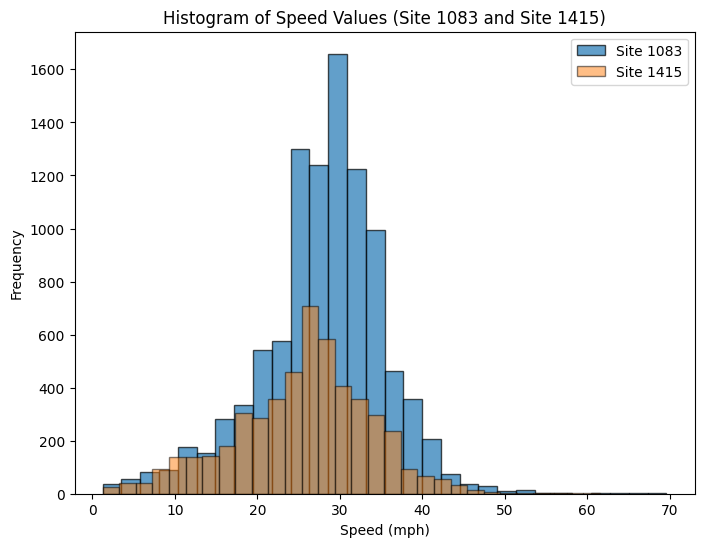

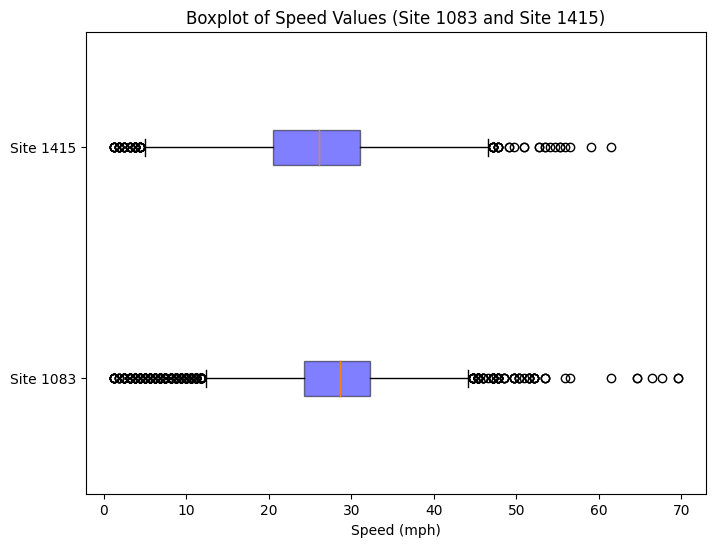

Number of observations at Site 1083: 9850, 
Mean Speed: 27.67027807106599
Number of observations at Site 1415: 5053, 
Mean Speed: 25.388789827825057
Weighted Average Speed: 26.90 mph
Estimated Journey Time: 6.74 minutes


In [48]:
# The data for site 1415 is loaded into a dataframe and the 'Date' column is converted to datetime format for easier time-based filtering.
site_1415 = pd.read_csv('rawpvr_2018-02-01_28d_1415 TueFri.csv')
site_1415['Date'] = pd.to_datetime(site_1415['Date'])

# Assign values to'Flags' column to represent the day of the week (2 = Tuesday, 5 = Friday) and 'Flag Text' to represent the day name.
site_1415['Flags'] = site_1415['Date'].dt.dayofweek + 1 
site_1415['Flag Text'] = site_1415['Date'].dt.day_name()

# The data for site 1083 is Filtered for Tuesday 17:00 - 17:59:59 using the 'Flags' column (2 = Tuesday) and 'dt.hour' to extract the specified hour from the 'Date' column.
# The North lanes are also filtered through the 'Direction' (integers) column rather than the 'Direction Name' (Strings) as filterring through integers are more efficient than Strings.
site_1083_north = site_1083[
    (site_1083['Flags'] == 5) & 
    (site_1083['Direction'] == 1) & 
    (site_1083['Date'].dt.hour == 17)
]

# The same filters are applied for site 1415.
site_1415_north = site_1415[
    (site_1415['Flags'] == 5) & 
    (site_1415['Direction'] == 1) & 
    (site_1415['Date'].dt.hour == 17)
]

# The missing 'Speed (mph)' values are counted in both dataset before applying proceeding with further analysis.
print("Number of missing speed values (Site 1083):",
      site_1083_north['Speed (mph)'].isna().sum(),
      "Number of missing speed values (Site 1415):",
      site_1415_north['Speed (mph)'].isna().sum()
      )

# Basic descriptive statistics are generated for the 'Speed (mph)' values for both sites to help in understanding the central tendencies and dispersion of speed values.
print("\nDescriptive Statistics for Site 1083 (North Lanes, 17:00-17:59:59):")
print(site_1083_north['Speed (mph)'].describe())

print("\nDescriptive Statistics for Site 1415 (North Lanes, 17:00-17:59:59):")
print(site_1415_north['Speed (mph)'].describe())

# A histogram is generated to visualize the distribution of speed values in both sites.
plt.figure(figsize=(8, 6))
plt.hist(site_1083_north['Speed (mph)'].dropna(), bins=30, edgecolor='black', alpha=0.7, label='Site 1083')
plt.hist(site_1415_north['Speed (mph)'].dropna(), bins=30, edgecolor='black', alpha=0.5, label='Site 1415')
plt.title('Histogram of Speed Values (Site 1083 and Site 1415)')
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# A boxplot is drawn to visualize and compare the spread and outliers in 'Speed' (mph)' for both sites.
plt.figure(figsize=(8, 6))
plt.boxplot([site_1083_north['Speed (mph)'].dropna(), site_1415_north['Speed (mph)'].dropna()], 
            vert=False, 
            labels=['Site 1083', 'Site 1415'], 
            patch_artist=True, 
            boxprops=dict(facecolor='blue', alpha=0.5))
plt.title('Boxplot of Speed Values (Site 1083 and Site 1415)')
plt.xlabel('Speed (mph)')
plt.show()

# The IQR method is applied to detect and remove upper outliers in speed values for both sites.
# Upper bound Speed outliers will skew results, and filtering them out is essential for obtaining a more accurate approximation of the average speed.
Q1_1083 = site_1083_north['Speed (mph)'].quantile(0.25)
Q3_1083 = site_1083_north['Speed (mph)'].quantile(0.75)
IQR_1083 = Q3_1083 - Q1_1083
upper_bound_1083 = Q3_1083 + 1.5 * IQR_1083  


Q1_1415 = site_1415_north['Speed (mph)'].quantile(0.25)
Q3_1415 = site_1415_north['Speed (mph)'].quantile(0.75)
IQR_1415 = Q3_1415 - Q1_1415
upper_bound_1415 = Q3_1415 + 1.5 * IQR_1415 

# The upper outliers are filtered out for both sites
site_1083_north_clean = site_1083_north[site_1083_north['Speed (mph)'] <= upper_bound_1083]
site_1415_north_clean = site_1415_north[site_1415_north['Speed (mph)'] <= upper_bound_1415]

# The number of observations and the mean speed are calculated for each site after outlier removal.
n_1083 = site_1083_north_clean.shape[0]
mu_1083 = site_1083_north_clean['Speed (mph)'].mean()

n_1415 = site_1415_north_clean.shape[0]
mu_1415 = site_1415_north_clean['Speed (mph)'].mean()

# The number of valid observations and mean speed for each site are displayed.
print(f"Number of observations at Site 1083: {n_1083}, \nMean Speed: {mu_1083}")
print(f"Number of observations at Site 1415: {n_1415}, \nMean Speed: {mu_1415}")

# The weighted average speed is then calculated and based on the number of observations and average speeds for both sites.
weighted_avg_speed = ((n_1083 * mu_1083) + (n_1415 * mu_1415)) / (n_1083 + n_1415)
print(f"Weighted Average Speed: {weighted_avg_speed:.2f} mph")

# To maintain the same units during calculation, the given distance is converted to miles and the Journey Time is converted into minutes, as minutes are the typical units of time displayed in real-world scenarios.
distance_miles = 4.86 * 0.621371
JT_minutes = (distance_miles / weighted_avg_speed) * 60
print(f"Estimated Journey Time: {JT_minutes:.2f} minutes")